VTP_DemandData_V2.0

In [154]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
df = pd.read_excel('VTP_DemandData_V2.0.xlsx')
df.head()



,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (MM/DD/YY),Year
0,Bắc Giang,Kon Tum,Printed papers,2.000000,KG,30.00,in3,2020-01-01,2020
1,Bắc Kạn,Lạng Sơn,Domestic Express mail,0.500000,KG,7.50,in3,2020-01-01,2020
2,Bắc Ninh,Lào Cai,Flower telegraph and gift,1.500000,KG,11.25,in3,2020-01-01,2020
3,Bình Định,Long An,International Parcel Post,1.500000,KG,22.50,in3,2020-01-01,2020
4,Bình Dương,Nam Định,Fast Moving Consumer Goods,1.333333,KG,20.00,in3,2020-01-01,2020


# Preprocessing

In [156]:
df['month'] = pd.DatetimeIndex(df['Customer Requested Delivery Date (MM/DD/YY)']).month

In [157]:
df['day'] = pd.DatetimeIndex(df['Customer Requested Delivery Date (MM/DD/YY)']).day

In [158]:
df.head()

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (MM/DD/YY),Year,month,day
0,Bắc Giang,Kon Tum,Printed papers,2.000000,KG,30.00,in3,2020-01-01,2020,1,1
1,Bắc Kạn,Lạng Sơn,Domestic Express mail,0.500000,KG,7.50,in3,2020-01-01,2020,1,1
2,Bắc Ninh,Lào Cai,Flower telegraph and gift,1.500000,KG,11.25,in3,2020-01-01,2020,1,1
3,Bình Định,Long An,International Parcel Post,1.500000,KG,22.50,in3,2020-01-01,2020,1,1
4,Bình Dương,Nam Định,Fast Moving Consumer Goods,1.333333,KG,20.00,in3,2020-01-01,2020,1,1


In [159]:
df['Year'].value_counts()

2019    1512
2018    1512
2017    1512
2020    1512
2016    1512
Name: Year, dtype: int64

In [160]:
df_test = df[df['Year']==2020]

In [161]:
df_train = df[df['Year']!=2020]

In [162]:
df_train

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (MM/DD/YY),Year,month,day
1512,Bắc Giang,Kon Tum,Printed papers,1.142857,KG,17.142857,in3,2019-01-01,2019,1,1
1513,Bắc Kạn,Lạng Sơn,Domestic Express mail,0.285714,KG,4.285714,in3,2019-01-01,2019,1,1
1514,Bắc Ninh,Lào Cai,Flower telegraph and gift,0.857143,KG,6.428571,in3,2019-01-01,2019,1,1
1515,Bình Định,Long An,International Parcel Post,0.857143,KG,12.857143,in3,2019-01-01,2019,1,1
1516,Bình Dương,Nam Định,Fast Moving Consumer Goods,0.761905,KG,11.428571,in3,2019-01-01,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7555,Hà Tĩnh,Sơn La,Telecommunications Device,5.000000,KG,75.000000,in3,2016-12-07,2016,12,7
7556,Hải Dương,Thái Bình,International Parcel Post,0.833333,KG,12.500000,in3,2016-12-07,2016,12,7
7557,Hải Phòng,Thanh Hoá,Flower telegraph and gift,1.666667,KG,25.000000,in3,2016-12-07,2016,12,7
7558,Hoà Bình,Trà Vinh,Ordinary mail,0.333333,KG,5.000000,in3,2016-12-07,2016,12,7


In [163]:
df_train.isnull().sum()

Origin                                         0
Destination                                    0
Item                                           0
Weight                                         0
Weight UoM                                     0
Size/Volume                                    0
Volume UoM                                     0
Customer Requested Delivery Date (MM/DD/YY)    0
Year                                           0
month                                          0
day                                            0
dtype: int64

In [164]:
df_train.dtypes

Origin                                                 object
Destination                                            object
Item                                                   object
Weight                                                float64
Weight UoM                                             object
Size/Volume                                           float64
Volume UoM                                             object
Customer Requested Delivery Date (MM/DD/YY)    datetime64[ns]
Year                                                    int64
month                                                   int64
day                                                     int64
dtype: object

In [165]:
df_train.head()

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (MM/DD/YY),Year,month,day
1512,Bắc Giang,Kon Tum,Printed papers,1.142857,KG,17.142857,in3,2019-01-01,2019,1,1
1513,Bắc Kạn,Lạng Sơn,Domestic Express mail,0.285714,KG,4.285714,in3,2019-01-01,2019,1,1
1514,Bắc Ninh,Lào Cai,Flower telegraph and gift,0.857143,KG,6.428571,in3,2019-01-01,2019,1,1
1515,Bình Định,Long An,International Parcel Post,0.857143,KG,12.857143,in3,2019-01-01,2019,1,1
1516,Bình Dương,Nam Định,Fast Moving Consumer Goods,0.761905,KG,11.428571,in3,2019-01-01,2019,1,1


In [166]:
df1 = df_train.iloc[:,[0,1,2,3,5,8,9,10]]

In [167]:
df1

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
1512,Bắc Giang,Kon Tum,Printed papers,1.142857,17.142857,2019,1,1
1513,Bắc Kạn,Lạng Sơn,Domestic Express mail,0.285714,4.285714,2019,1,1
1514,Bắc Ninh,Lào Cai,Flower telegraph and gift,0.857143,6.428571,2019,1,1
1515,Bình Định,Long An,International Parcel Post,0.857143,12.857143,2019,1,1
1516,Bình Dương,Nam Định,Fast Moving Consumer Goods,0.761905,11.428571,2019,1,1
...,...,...,...,...,...,...,...,...
7555,Hà Tĩnh,Sơn La,Telecommunications Device,5.000000,75.000000,2016,12,7
7556,Hải Dương,Thái Bình,International Parcel Post,0.833333,12.500000,2016,12,7
7557,Hải Phòng,Thanh Hoá,Flower telegraph and gift,1.666667,25.000000,2016,12,7
7558,Hoà Bình,Trà Vinh,Ordinary mail,0.333333,5.000000,2016,12,7


In [168]:
for col in df1.columns:
    print(col,':' ,len(df1[col].unique()))

Origin : 18
Destination : 18
Item : 10
Weight : 43
Size/Volume : 44
Year : 4
month : 12
day : 7


In [169]:
labels = df1['Origin'].astype('category').cat.categories.tolist()

labels1 = df1['Destination'].astype('category').cat.categories.tolist()

labels2 = df1['Item'].astype('category').cat.categories.tolist()

In [170]:
replace_map_comp = {'Origin' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map_comp1 = {'Destination' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}
replace_map_comp2 = {'Item' : {k: v for k,v in zip(labels2,list(range(1,len(labels2)+1)))}}

In [171]:
df1.head()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
1512,Bắc Giang,Kon Tum,Printed papers,1.142857,17.142857,2019,1,1
1513,Bắc Kạn,Lạng Sơn,Domestic Express mail,0.285714,4.285714,2019,1,1
1514,Bắc Ninh,Lào Cai,Flower telegraph and gift,0.857143,6.428571,2019,1,1
1515,Bình Định,Long An,International Parcel Post,0.857143,12.857143,2019,1,1
1516,Bình Dương,Nam Định,Fast Moving Consumer Goods,0.761905,11.428571,2019,1,1


In [172]:
df1.replace(replace_map_comp, inplace=True)
df1.replace(replace_map_comp1, inplace=True)
df1.replace(replace_map_comp2, inplace=True)

C:\Users\Ankit Srivastava\Anaconda3\envs\test\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [173]:
df1.head()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
1512,4,1,8,1.142857,17.142857,2019,1,1
1513,5,3,2,0.285714,4.285714,2019,1,1
1514,6,2,4,0.857143,6.428571,2019,1,1
1515,3,4,6,0.857143,12.857143,2019,1,1
1516,1,5,3,0.761905,11.428571,2019,1,1


# Data Analysis

In [174]:
import seaborn as sns

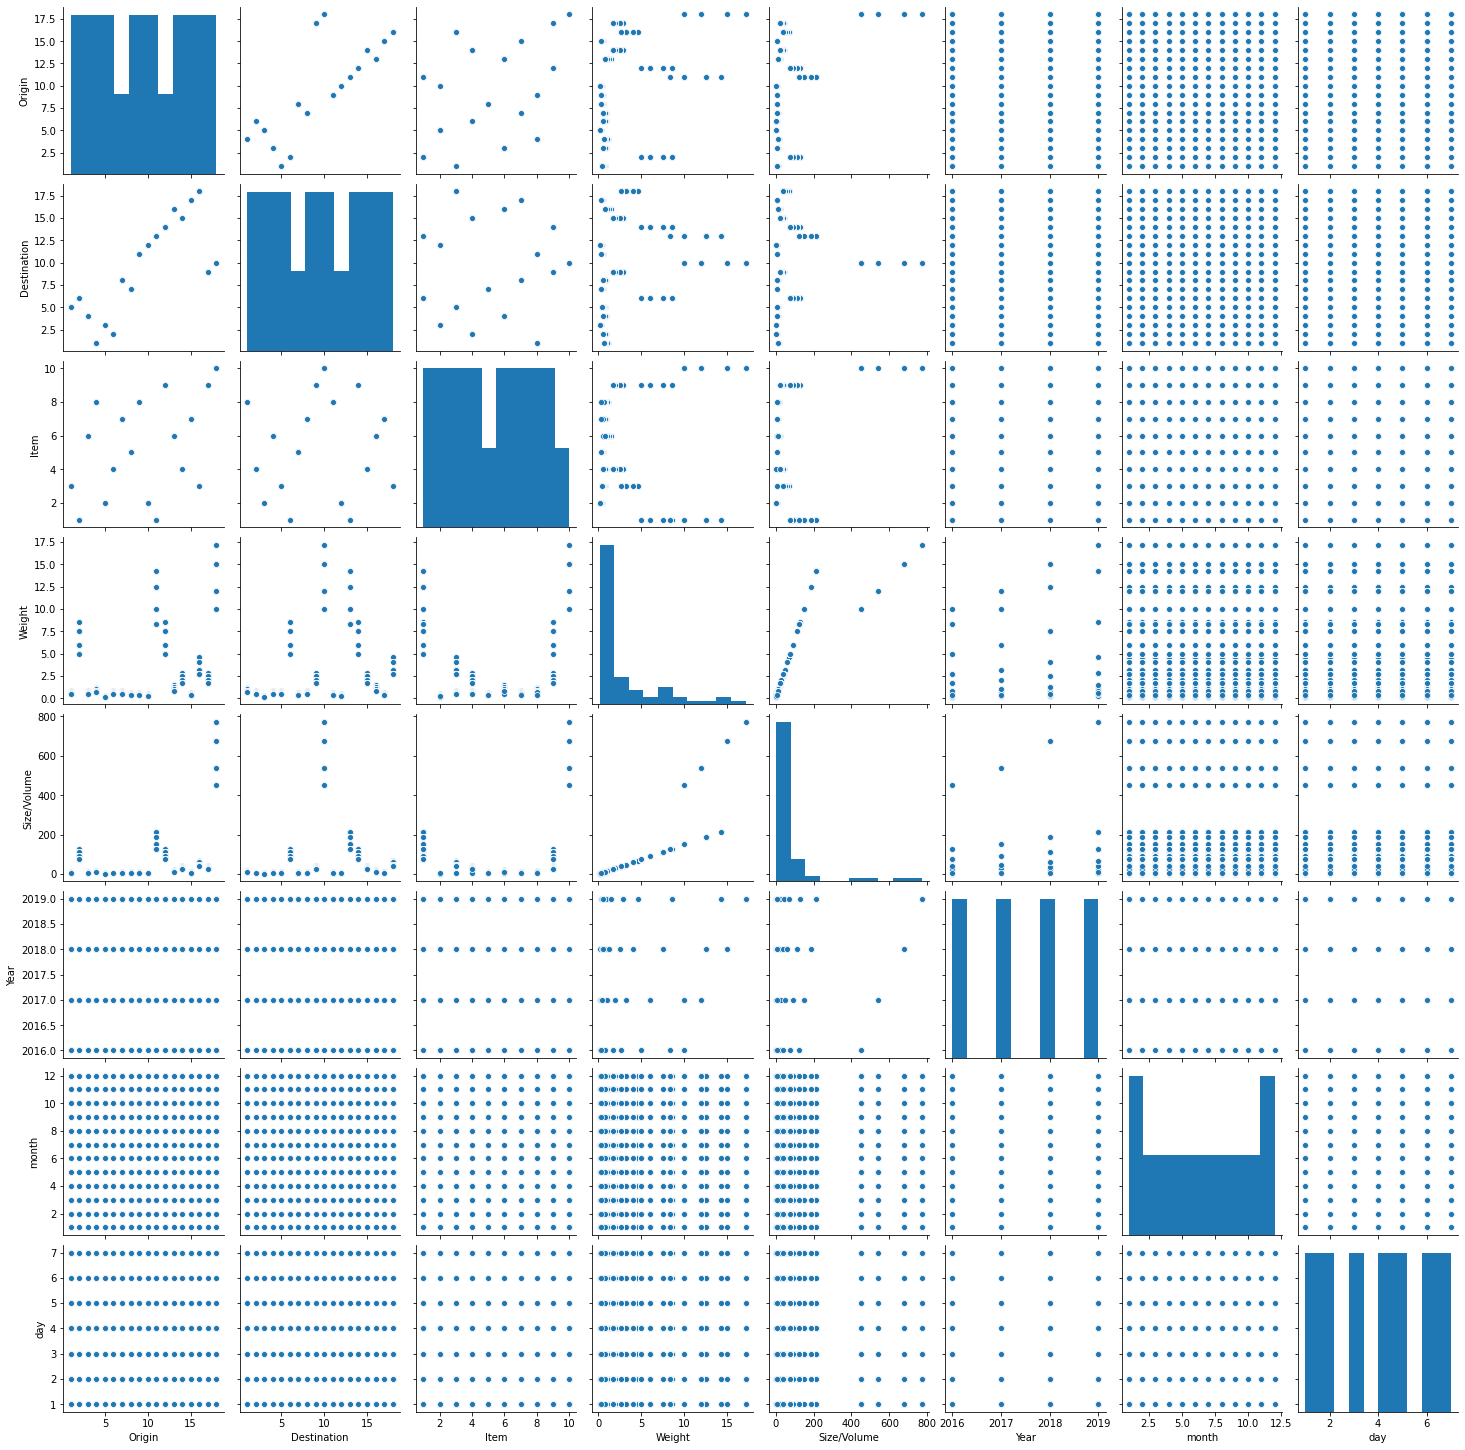

In [175]:
sns.pairplot(df1)

In [176]:
target = 'Weight'

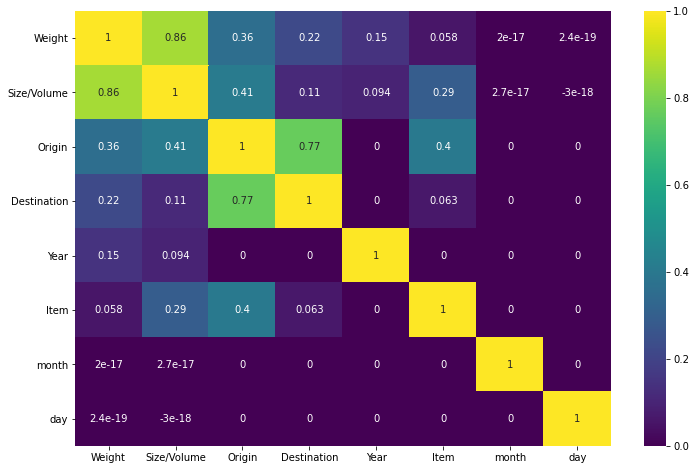

In [177]:
k = 8 #number of variables for heatmap
cols = df1.corr().nlargest(k, target)[target].index
cm = df1[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [178]:
X_trn = df1.iloc[:,[0,1,2,5,6,7]]

In [179]:
y_trn = df1.iloc[:,[3,4]]

In [180]:
df1.dtypes

Origin           int64
Destination      int64
Item             int64
Weight         float64
Size/Volume    float64
Year             int64
month            int64
day              int64
dtype: object

In [181]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
model = RandomForestRegressor()
# Fit on training data
model.fit(X_trn,y_trn)


RandomForestRegressor()

In [182]:
prd = model.predict(X_tst)

In [183]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_tst,prd)
rmse = np.sqrt(mse)
rmse

103.43191873228373

In [184]:
from sklearn import datasets, linear_model

In [185]:
regr = linear_model.LinearRegression() 
   
# Train the model using the training sets 
regr.fit(X_trn,y_trn) 

LinearRegression()

In [186]:
prd1 = regr.predict(X_tst)

In [187]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_tst,prd1)
rmse = np.sqrt(mse)
rmse

198.07444859539783

In [188]:
from sklearn import neighbors

In [189]:
knn = neighbors.KNeighborsRegressor()
y_ = knn.fit(X_trn,y_trn)

In [190]:
prd2 = y_.predict(X_tst)

In [191]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_tst,prd2)
rmse = np.sqrt(mse)
rmse

103.6285800487493

In [192]:
r2_score(y_tst,prd1) 

0.10942068894114498

In [193]:
X_tst.shape

(1512, 6)

In [194]:
y_tst.shape

(1512, 2)

In [195]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [197]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [198]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [199]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [200]:
rf_random.fit(X_trn,y_trn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [209]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [210]:
rf_random.best_score_

-2.306782154946377e-08

In [211]:

predictions=rf_random.predict(X_tst)

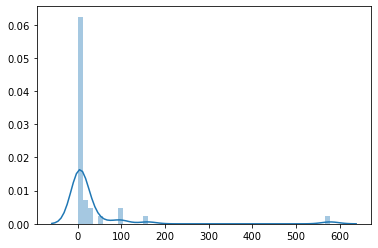

In [212]:
sns.distplot(y_tst-predictions)

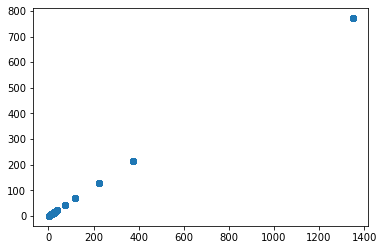

In [213]:

plt.scatter(y_tst,predictions)

In [214]:
from sklearn import metrics

In [215]:
print('MAE:', metrics.mean_absolute_error(y_tst, predictions))
print('MSE:', metrics.mean_squared_error(y_tst, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_tst, predictions)))

MAE: 32.97718253968232
MSE: 10698.161812641672
RMSE: 103.43191873228338


In [549]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date, timedelta

In [550]:
numpy_data = np.array(['2', '2', '2020-01-01','2020-01-05'])

In [551]:


dt1 = datetime.strptime(numpy_data[2], '%Y-%m-%d')
dt2 = datetime.strptime(numpy_data[3], '%Y-%m-%d')

sdate = date(dt1.year, dt1.month, dt1.day)   # start date
edate = date(dt2.year, dt2.month, dt2.day)   # end date

delta = edate - sdate  

a= len(range(delta.days+1))
ex = {}
result = {}
for i in range(delta.days + 1):
    day =str(sdate + timedelta(days=i))
    
    dt = datetime.strptime(day, '%Y-%m-%d')
    
    d={'origin':[numpy_data[0]]*10,
        'dest':[numpy_data[1]]*10,
        'item':list(range(1,11)),
        'year':[dt.year]*10,
        'month':[dt.month]*10,
        'day':[dt.day]*10}
    
    
    for key in (d.keys()):
        if key in d:
            result.setdefault(key, []).extend(d[key])
    
dfs1 = pd.DataFrame(result)
    


In [552]:
dfs1

,origin,dest,item,year,month,day
0,2,2,1,2020,1,1
1,2,2,2,2020,1,1
2,2,2,3,2020,1,1
3,2,2,4,2020,1,1
4,2,2,5,2020,1,1
5,2,2,6,2020,1,1
6,2,2,7,2020,1,1
7,2,2,8,2020,1,1
8,2,2,9,2020,1,1
9,2,2,10,2020,1,1


In [553]:
final_pred = model.predict(dfs1)

In [554]:
final_pred

array([[  8.57142857, 128.57142857],
       [  0.88952381,  13.34285714],
       [  0.88952381,  13.34285714],
       [  0.88952381,  13.34285714],
       [  0.90666667,  13.6       ],
       [  0.92190476,  13.82857143],
       [  0.92190476,  13.82857143],
       [  1.0152381 ,  15.22857143],
       [  6.4       ,  96.        ],
       [  8.77142857, 249.85714286],
       [  8.57142857, 128.57142857],
       [  0.88952381,  13.34285714],
       [  0.88952381,  13.34285714],
       [  0.88952381,  13.34285714],
       [  0.90666667,  13.6       ],
       [  0.92190476,  13.82857143],
       [  0.92190476,  13.82857143],
       [  1.0152381 ,  15.22857143],
       [  6.4       ,  96.        ],
       [  8.77142857, 249.85714286],
       [  8.57142857, 128.57142857],
       [  0.88952381,  13.34285714],
       [  0.88952381,  13.34285714],
       [  0.88952381,  13.34285714],
       [  0.90666667,  13.6       ],
       [  0.92190476,  13.82857143],
       [  0.92190476,  13.82857143],
 

In [555]:
final_pred[0][1]

128.5714285714288

In [556]:
waight=[]
volume=[]
for i in range(len(final_pred)):
    waight.append(final_pred[i][0])
    volume.append(final_pred[i][1])



In [557]:
len(waight)

50

In [558]:
numpy_data[0]

'2'

In [559]:
origin_replace

{1: 'Bình Dương ',
 2: 'Bình Phước ',
 3: 'Bình Định ',
 4: 'Bắc Giang ',
 5: 'Bắc Kạn ',
 6: 'Bắc Ninh ',
 7: 'Cao Bằng ',
 8: 'Cà Mau ',
 9: 'Gia Lai ',
 10: 'Hà Giang ',
 11: 'Hà Nam ',
 12: 'Hà Tĩnh ',
 13: 'Hải Dương ',
 14: 'Hải Phòng ',
 15: 'Hoà Bình ',
 16: 'Khánh Hoà ',
 17: 'Đà Nẵng ',
 18: 'Đắk Lăk '}

In [560]:
origin_replace[1]

'Bình Dương '

In [561]:
orig=[]
des=[]
v1= int(numpy_data[0])
v2= int(numpy_data[1])
for i in range(1,len(origin_replace)+1):
    if v1 == i :
        orig = origin_replace[i]
    
    if v2 == i :
        des = dest_replace[i]
        
    
print(orig,dest)

Bình Phước  Lào Cai 


In [562]:

dfs1['predected waight']= waight
dfs1['predected volume']= volume

In [563]:
len(final_pred)

50

In [564]:
dfs1.head()

,origin,dest,item,year,month,day,predected waight,predected volume
0,2,2,1,2020,1,1,8.571429,128.571429
1,2,2,2,2020,1,1,0.889524,13.342857
2,2,2,3,2020,1,1,0.889524,13.342857
3,2,2,4,2020,1,1,0.889524,13.342857
4,2,2,5,2020,1,1,0.906667,13.600000


In [565]:
dfs1.shape

(50, 8)

In [566]:
volume

[128.5714285714288,
 13.342857142857135,
 13.342857142857135,
 13.342857142857135,
 13.599999999999996,
 13.828571428571427,
 13.828571428571427,
 15.228571428571414,
 96.00000000000007,
 249.85714285714263,
 128.5714285714288,
 13.342857142857135,
 13.342857142857135,
 13.342857142857135,
 13.599999999999996,
 13.828571428571427,
 13.828571428571427,
 15.228571428571414,
 96.00000000000007,
 249.85714285714263,
 128.5714285714288,
 13.342857142857135,
 13.342857142857135,
 13.342857142857135,
 13.599999999999996,
 13.828571428571427,
 13.828571428571427,
 15.228571428571414,
 96.00000000000007,
 249.85714285714263,
 128.5714285714288,
 13.342857142857135,
 13.342857142857135,
 13.342857142857135,
 13.599999999999996,
 13.828571428571427,
 13.828571428571427,
 15.228571428571414,
 96.00000000000007,
 249.85714285714263,
 128.5714285714288,
 13.342857142857135,
 13.342857142857135,
 13.342857142857135,
 13.599999999999996,
 13.828571428571427,
 13.828571428571427,
 15.228571428571414,
 

In [572]:
dfs1['myDt']=pd.to_datetime(dfs1[['year','month','day']])

KeyError: "None of [Index(['year', 'month', 'day'], dtype='object')] are in the [columns]"

In [568]:
dfs1 = dfs1.drop(['year','month','day','origin','dest'], axis =1) 

In [569]:
dfs1.head()

,item,predected waight,predected volume,myDt
0,1,8.571429,128.571429,2020-01-01
1,2,0.889524,13.342857,2020-01-01
2,3,0.889524,13.342857,2020-01-01
3,4,0.889524,13.342857,2020-01-01
4,5,0.906667,13.600000,2020-01-01


In [479]:
replace_map_comp1

{'Destination': {'Kon Tum ': 1,
  'Lào Cai ': 2,
  'Lạng Sơn ': 3,
  'Long An ': 4,
  'Nam Định ': 5,
  'Ninh Bình ': 6,
  'Phú Thọ ': 7,
  'Quảng Bình ': 8,
  'Quảng Nam ': 9,
  'Quảng Ngãi ': 10,
  'Quảng Ninh ': 11,
  'Quảng Trị ': 12,
  'Sóc Trăng ': 13,
  'Sơn La ': 14,
  'Thanh Hoá ': 15,
  'Thái Bình ': 16,
  'Trà Vinh ': 17,
  'Vĩnh Long ': 18}}

In [480]:
dest_replace = {'Kon Tum ': 1,
  'Lào Cai ': 2,
  'Lạng Sơn ': 3,
  'Long An ': 4,
  'Nam Định ': 5,
  'Ninh Bình ': 6,
  'Phú Thọ ': 7,
  'Quảng Bình ': 8,
  'Quảng Nam ': 9,
  'Quảng Ngãi ': 10,
  'Quảng Ninh ': 11,
  'Quảng Trị ': 12,
  'Sóc Trăng ': 13,
  'Sơn La ': 14,
  'Thanh Hoá ': 15,
  'Thái Bình ': 16,
  'Trà Vinh ': 17,
  'Vĩnh Long ': 18}

In [481]:
dest_replace = dict([(value, key) for key, value in dest_replace.items()]) 

In [482]:
dest_replace ={1: 'Kon Tum ',
 2: 'Lào Cai ',
 3: 'Lạng Sơn ',
 4: 'Long An ',
 5: 'Nam Định ',
 6: 'Ninh Bình ',
 7: 'Phú Thọ ',
 8: 'Quảng Bình ',
 9: 'Quảng Nam ',
 10: 'Quảng Ngãi ',
 11: 'Quảng Ninh ',
 12: 'Quảng Trị ',
 13: 'Sóc Trăng ',
 14: 'Sơn La ',
 15: 'Thanh Hoá ',
 16: 'Thái Bình ',
 17: 'Trà Vinh ',
 18: 'Vĩnh Long '}

In [483]:
origin_replace ={1: 'Bình Dương ',
 2: 'Bình Phước ',
 3: 'Bình Định ',
 4: 'Bắc Giang ',
 5: 'Bắc Kạn ',
 6: 'Bắc Ninh ',
 7: 'Cao Bằng ',
 8: 'Cà Mau ',
 9: 'Gia Lai ',
 10: 'Hà Giang ',
 11: 'Hà Nam ',
 12: 'Hà Tĩnh ',
 13: 'Hải Dương ',
 14: 'Hải Phòng ',
 15: 'Hoà Bình ',
 16: 'Khánh Hoà ',


In [484]:
dfs1.replace(item_replace, inplace=True)

In [485]:
dfs1.head()

,item,predected waight,predected volume,myDt
0,Commoditity,8.571429,128.571429,2020-01-01
1,Domestic Express mail,0.889524,13.342857,2020-01-01
2,Fast Moving Consumer Goods,0.889524,13.342857,2020-01-01
3,Flower telegraph and gift,0.889524,13.342857,2020-01-01
4,International Letter Post,0.906667,13.600000,2020-01-01


In [487]:
dfs1.head()

,item,predected waight,predected volume,myDt
0,Commoditity,8.571429,128.571429,2020-01-01
1,Domestic Express mail,0.889524,13.342857,2020-01-01
2,Fast Moving Consumer Goods,0.889524,13.342857,2020-01-01
3,Flower telegraph and gift,0.889524,13.342857,2020-01-01
4,International Letter Post,0.906667,13.600000,2020-01-01


In [488]:
df_test.head()

,Origin,Destination,Item,Weight,Weight UoM,Size/Volume,Volume UoM,Customer Requested Delivery Date (MM/DD/YY),Year,month,day
0,Bắc Giang,Kon Tum,Printed papers,2.000000,KG,30.00,in3,2020-01-01,2020,1,1
1,Bắc Kạn,Lạng Sơn,Domestic Express mail,0.500000,KG,7.50,in3,2020-01-01,2020,1,1
2,Bắc Ninh,Lào Cai,Flower telegraph and gift,1.500000,KG,11.25,in3,2020-01-01,2020,1,1
3,Bình Định,Long An,International Parcel Post,1.500000,KG,22.50,in3,2020-01-01,2020,1,1
4,Bình Dương,Nam Định,Fast Moving Consumer Goods,1.333333,KG,20.00,in3,2020-01-01,2020,1,1


In [489]:
df2 = df_test.iloc[:,[0,1,2,3,5,8,9,10]]

In [490]:
df2.head()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
0,Bắc Giang,Kon Tum,Printed papers,2.000000,30.00,2020,1,1
1,Bắc Kạn,Lạng Sơn,Domestic Express mail,0.500000,7.50,2020,1,1
2,Bắc Ninh,Lào Cai,Flower telegraph and gift,1.500000,11.25,2020,1,1
3,Bình Định,Long An,International Parcel Post,1.500000,22.50,2020,1,1
4,Bình Dương,Nam Định,Fast Moving Consumer Goods,1.333333,20.00,2020,1,1


In [491]:
replace_map_comp2

{'Item': {'Commoditity': 1,
  'Domestic Express mail': 2,
  'Fast Moving Consumer Goods': 3,
  'Flower telegraph and gift ': 4,
  'International Letter Post': 5,
  'International Parcel Post': 6,
  'Ordinary mail': 7,
  'Printed papers': 8,
  'Telecommunications Device': 9,
  'Television Device': 10}}

In [492]:
df2.replace(replace_map_comp, inplace=True)
df2.replace(replace_map_comp1, inplace=True)
df2.replace(replace_map_comp2, inplace=True)

C:\Users\Ankit Srivastava\Anaconda3\envs\test\lib\site-packages\pandas\core\generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [493]:
df2.tail()

,Origin,Destination,Item,Weight,Size/Volume,Year,month,day
1507,12,14,9,15.0,225.0,2020,12,7
1508,13,16,6,2.5,37.5,2020,12,7
1509,14,15,4,5.0,75.0,2020,12,7
1510,15,17,7,1.0,15.0,2020,12,7
1511,16,18,3,8.0,120.0,2020,12,7


In [494]:
X_tst = df2.iloc[:,[0,1,2,5,6,7]]

In [495]:
y_tst = df2.iloc[:,[3,4]]

In [496]:
X_tst.head()

,Origin,Destination,Item,Year,month,day
0,4,1,8,2020,1,1
1,5,3,2,2020,1,1
2,6,2,4,2020,1,1
3,3,4,6,2020,1,1
4,1,5,3,2020,1,1


In [497]:
rf_predictions = model.predict(X_tst)

In [498]:
predictions = model.predict([newArray])

NameError: name 'newArray' is not defined

In [499]:
rf_predictions

array([[ 1.14285714, 17.14285714],
       [ 0.28571429,  4.28571429],
       [ 0.85714286,  6.42857143],
       ...,
       [ 2.85714286, 42.85714286],
       [ 0.57142857,  8.57142857],
       [ 4.57142857, 68.57142857]])

In [500]:
import pickle


# Saving model to disk
pickle.dump(model, open('Forecast2.pkl','wb',),protocol=2)

# Loading model to compare the results
frecast = pickle.load(open('Forecast2.pkl','rb'))

In [501]:
predictions = frecast.predict([newArray])

NameError: name 'newArray' is not defined

In [502]:
predictions[0] = predictions[0].toFixed(2)

AttributeError: 'numpy.ndarray' object has no attribute 'toFixed'

In [503]:
x = np.round(predictions, decimals=3)

In [504]:
x

array([[ 1.143, 17.143],
       [ 0.286,  4.286],
       [ 0.857,  6.429],
       ...,
       [ 2.857, 42.857],
       [ 0.571,  8.571],
       [ 4.571, 68.571]])

In [505]:
predictions

array([[ 1.14285714, 17.14285714],
       [ 0.28571429,  4.28571429],
       [ 0.85714286,  6.42857143],
       ...,
       [ 2.85714286, 42.85714286],
       [ 0.57142857,  8.57142857],
       [ 4.57142857, 68.57142857]])

In [506]:
rf_predictions

array([[ 1.14285714, 17.14285714],
       [ 0.28571429,  4.28571429],
       [ 0.85714286,  6.42857143],
       ...,
       [ 2.85714286, 42.85714286],
       [ 0.57142857,  8.57142857],
       [ 4.57142857, 68.57142857]])

In [507]:
y_tst

,Weight,Size/Volume
0,2.000000,30.00
1,0.500000,7.50
2,1.500000,11.25
3,1.500000,22.50
4,1.333333,20.00
...,...,...
1507,15.000000,225.00
1508,2.500000,37.50
1509,5.000000,75.00
1510,1.000000,15.00


In [508]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_tst,rf_predictions)
rmse = np.sqrt(mse)
rmse

103.43191873228373

In [509]:
numpy_data = np.array(['2', '2', '2020-06-18'])

In [510]:
numpy_data[2]

'2020-06-18'

In [511]:
dt = datetime.strptime(numpy_data[2], '%Y-%m-%d')

In [512]:
print(dt.year, dt.month, dt.day)

2020 6 18


In [513]:
import pandas as pd

d={'origin':[numpy_data[0]]*10,
   'dest':[numpy_data[1]]*10,
   'item':list(range(1,11)),
  'year':[dt.year]*10,
  'month':[dt.month]*10,
  'day':[dt.day]*10}
df=pd.DataFrame(d)
df_lags=pd.DataFrame()

In [514]:
df

,origin,dest,item,year,month,day
0,2,2,1,2020,6,18
1,2,2,2,2020,6,18
2,2,2,3,2020,6,18
3,2,2,4,2020,6,18
4,2,2,5,2020,6,18
5,2,2,6,2020,6,18
6,2,2,7,2020,6,18
7,2,2,8,2020,6,18
8,2,2,9,2020,6,18
9,2,2,10,2020,6,18


In [515]:
X_tst

,Origin,Destination,Item,Year,month,day
0,4,1,8,2020,1,1
1,5,3,2,2020,1,1
2,6,2,4,2020,1,1
3,3,4,6,2020,1,1
4,1,5,3,2020,1,1
...,...,...,...,...,...,...
1507,12,14,9,2020,12,7
1508,13,16,6,2020,12,7
1509,14,15,4,2020,12,7
1510,15,17,7,2020,12,7


In [516]:
prd = model.predict(df)

In [517]:
prd

array([[  8.57142857, 128.57142857],
       [  0.88952381,  13.34285714],
       [  0.88952381,  13.34285714],
       [  0.88952381,  13.34285714],
       [  0.90666667,  13.6       ],
       [  0.92190476,  13.82857143],
       [  0.92190476,  13.82857143],
       [  1.0152381 ,  15.22857143],
       [  6.4       ,  96.        ],
       [  8.77142857, 249.85714286]])

In [518]:
prd[0][0]

8.571428571428559